In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [174]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**UNIVARATE ANALYSIS**

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [176]:
df.groupby(['Churn']).count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
No,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174
Yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


In [177]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [178]:
columns = list(df.columns)
for x in columns:
    print(x,df[x].nunique())

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


In [179]:
df[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [180]:
df["TotalCharges"] = df["TotalCharges"].replace(' ',np.NaN)
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [182]:
numbers = ["MonthlyCharges","TotalCharges"]
for x in numbers:
    print(x)
    print("Mean: ", df[x].mean())
    print("Median: ", df[x].median())
    print("Mode: ", df[x].mode())
    print("Skew: ", df[x].skew())
    print("Kurtosis: ", df[x].kurt())
    print("*************")

MonthlyCharges
Mean:  64.76169246059922
Median:  70.35
Mode:  0    20.05
dtype: float64
Skew:  -0.22052443394398033
Kurtosis:  -1.2572596945495056
*************
TotalCharges
Mean:  2283.3004408418697
Median:  1397.475
Mode:  0    20.2
dtype: float64
Skew:  0.961642499724251
Kurtosis:  -0.231798760869379
*************


Text(0, 0.5, 'Distribution')

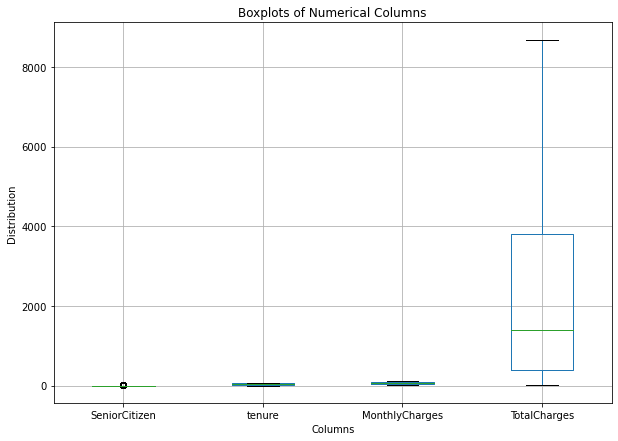

In [183]:
plt.figure(figsize = (10,7))
df.boxplot()
plt.title("Boxplots of Numerical Columns")
plt.xlabel('Columns')
plt.ylabel('Distribution')

**Bi-Variate Analysis**

1. Demographic:

    a. Which 2 demographics have proven to be the most popular with the telco brand?
    
    b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

In [184]:
df = df.drop(columns="customerID")
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [185]:
le = LabelEncoder()
telco = df.copy()
telco["Churn"] = le.fit_transform(telco["Churn"])
telco.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


<AxesSubplot:xlabel='SeniorCitizen,Churn'>

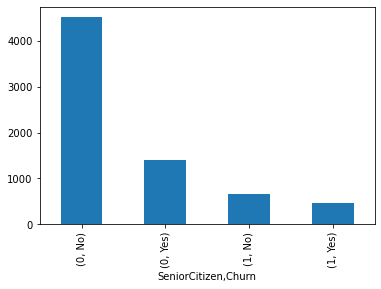

In [186]:
df_plot = df.groupby(['SeniorCitizen', 'Churn']).size()
df_plot.plot(x=df_plot.index, kind='bar', stacked=False)

Customers who seem to not be Senior Citizens, appear to be the majority and they relatively Churn a lot less if they are not Senior Citizens.

<AxesSubplot:xlabel='gender,Churn'>

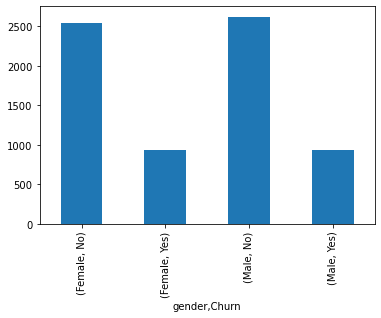

In [187]:
df_plot2 = df.groupby(['gender', 'Churn']).size()
df_plot2.plot(x=df_plot.index, kind='bar', stacked=False)

Gender doesn't seem to have that much of an effect on Churn rate.

<AxesSubplot:xlabel='Partner,Churn'>

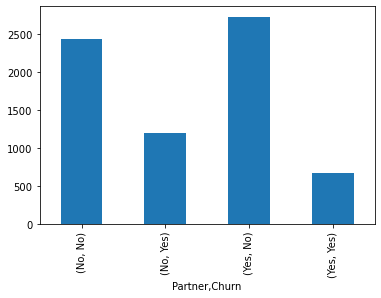

In [188]:
df_plot3 = df.groupby(['Partner', 'Churn']).size()
df_plot3.plot(x=df_plot.index, kind='bar', stacked=False)

<AxesSubplot:xlabel='Dependents,Churn'>

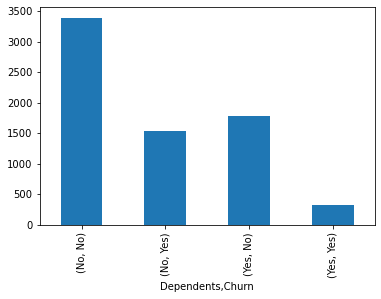

In [189]:
df_plot4 = df.groupby(['Dependents', 'Churn']).size()
df_plot4.plot(x=df_plot.index, kind='bar', stacked=False)

In [190]:
corr_target = df[["gender","SeniorCitizen","Partner","Dependents","Churn"]]
corr_target.head()

,gender,SeniorCitizen,Partner,Dependents,Churn
0,Female,0,Yes,No,No
1,Male,0,No,No,No
2,Male,0,No,No,Yes
3,Male,0,No,No,No
4,Female,0,No,No,Yes


In [191]:
for x in list(corr_target.columns):
    print(corr_target[x].nunique())

2
2
2
2
2


In [192]:
for x in list(corr_target.columns):
    corr_target[x] = le.fit_transform(corr_target[x])
corr_target.head()

<ipython-input-192-908033e96626>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,SeniorCitizen,Partner,Dependents,Churn
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,1
3,1,0,0,0,0
4,0,0,0,0,1


In [193]:
corr_target.corr()

,gender,SeniorCitizen,Partner,Dependents,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,-0.164221
Churn,-0.008612,0.150889,-0.150448,-0.164221,1.000000


The correlations seem to be very weak with the Churn rate. However, from the Analysis above, we could recommend the company to focus advertisements to Non Senior Citizens of both genders with no dependents

***2. Services:***
    
    a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use vizualizations in explaining your analysis)
    
    b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

In [194]:
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [195]:
services_list = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
                "TechSupport","StreamingTV","StreamingMovies","Contract"]
for x in services_list:
    print(x)
    print(df[x].value_counts())
    print("*********")

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
*********
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
*********
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
*********
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
*********
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
*********
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
*********
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
*********
StreamingTV
No                     2810
Yes                    2707
No internet service    1526

In [196]:
df[services_list]

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month
1,Yes,No,DSL,Yes,No,Yes,No,No,No,One year
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year
4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year
7039,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year
7040,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month
7041,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month


In [197]:
services_list.append("MonthlyCharges")
services_list.append("Churn")
df[services_list]

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,No
7039,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,103.20,No
7040,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,29.60,No
7041,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,74.40,Yes


In [198]:
services = df[services_list]
phone_service = df.groupby(["PhoneService","Churn"])["MonthlyCharges"].mean().reset_index()
phone_service

,PhoneService,Churn,MonthlyCharges
0,No,No,43.520996
1,No,Yes,37.533824
2,Yes,No,63.213857
3,Yes,Yes,78.134255


In [199]:
fig = px.bar(phone_service, x="PhoneService", y="MonthlyCharges", color="Churn",
                 title="Phone Service Churn Rates")

# show plot 
fig.show()

In [200]:
multiple_lines = df.groupby(["PhoneService","Churn","MultipleLines"])["MonthlyCharges"].median().reset_index()
multiple_lines

,PhoneService,Churn,MultipleLines,MonthlyCharges
0,No,No,No phone service,43.775
1,No,Yes,No phone service,35.500
2,Yes,No,No,50.350
3,Yes,No,Yes,85.500
4,Yes,Yes,No,70.750
5,Yes,Yes,Yes,90.850


In [201]:
fig = px.bar(multiple_lines, x="PhoneService", y="MonthlyCharges", color="Churn", pattern_shape="MultipleLines",
             barmode="group", title="Multiple Lines Churn Rates")

# show plot 
fig.show()

In [202]:
internet_services = df.groupby(["PhoneService","Churn","InternetService"])["MonthlyCharges"].median().reset_index()
internet_services

,PhoneService,Churn,InternetService,MonthlyCharges
0,No,No,DSL,43.775
1,No,Yes,DSL,35.500
2,Yes,No,DSL,65.250
3,Yes,No,Fiber optic,94.800
4,Yes,No,No,20.150
5,Yes,Yes,DSL,53.900
6,Yes,Yes,Fiber optic,87.550
7,Yes,Yes,No,20.000


In [203]:
fig = px.bar(internet_services, x="PhoneService", y="MonthlyCharges", color="Churn", pattern_shape="InternetService",
             barmode="group", title="Internet Services Churn Rates")

# show plot 
fig.show()

In [204]:
streamingTV = df.groupby(["PhoneService",'Churn',"StreamingTV"])["MonthlyCharges"].mean().reset_index()
streamingTV

,PhoneService,Churn,StreamingTV,MonthlyCharges
0,No,No,No,36.196564
1,No,No,Yes,53.165385
2,No,Yes,No,31.732547
3,No,Yes,Yes,47.142188
4,Yes,No,No,69.779201
5,Yes,No,No internet service,21.136058
6,Yes,No,Yes,92.581310
7,Yes,Yes,No,71.531998
8,Yes,Yes,No internet service,20.368142
9,Yes,Yes,Yes,94.197000


In [205]:
fig = px.bar(streamingTV, x="PhoneService", y="MonthlyCharges", color="Churn", hover_name = "StreamingTV",
             barmode="group", title="StreamingTV Churn Rates")

# show plot 
fig.show()

In [206]:
StreamingMovies = df.groupby(["PhoneService",'Churn',"StreamingMovies"])["MonthlyCharges"].mean().reset_index()
StreamingMovies

,PhoneService,Churn,StreamingMovies,MonthlyCharges
0,No,No,No,35.979196
1,No,No,Yes,53.065044
2,No,Yes,No,31.138776
3,No,Yes,Yes,46.238194
4,Yes,No,No,69.622357
5,Yes,No,No internet service,21.136058
6,Yes,No,Yes,92.510219
7,Yes,Yes,No,71.680893
8,Yes,Yes,No internet service,20.368142
9,Yes,Yes,Yes,94.150871


In [207]:
fig = px.bar(StreamingMovies, x="PhoneService", y="MonthlyCharges", color="Churn", hover_name = "StreamingMovies",
             barmode="group", title="StreamingTV Churn Rates")

# show plot 
fig.show()

In [208]:
services.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,Yes


In [209]:
target = services.drop(columns="Contract")
target_columns = list(target.columns)
target_columns = [x for x in target_columns if x != "MonthlyCharges"]
expense = df.groupby(target_columns)["MonthlyCharges"].mean().reset_index().sort_values(by="MonthlyCharges",ascending=False)
expense.head(20)

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,MonthlyCharges
555,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,115.645000
554,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,No,115.027027
548,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Yes,110.712500
496,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Yes,110.160000
495,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,No,110.046377
524,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,No,110.004839
331,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,109.783333
330,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,No,109.655882
539,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,No,109.583333
525,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes,109.575000


In [210]:
le = LabelEncoder()
expense_copy = expense.copy()

for x in target_columns:
    expense_copy[x] = le.fit_transform(expense_copy[x])
expense_copy.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,MonthlyCharges
555,1,2,1,2,2,2,2,2,2,1,115.645000
554,1,2,1,2,2,2,2,2,2,0,115.027027
548,1,2,1,2,2,2,0,2,2,1,110.712500
496,1,2,1,0,2,2,2,2,2,1,110.160000
495,1,2,1,0,2,2,2,2,2,0,110.046377


In [211]:
expense_copy.corr()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,MonthlyCharges
PhoneService,1.000000,-0.003857,0.419552,0.010097,0.004870,0.004406,0.027975,0.013115,-0.003944,0.027926,0.673883
MultipleLines,-0.003857,1.000000,0.018593,0.011712,-0.000373,-0.008226,0.003854,0.003911,0.016074,-0.013298,0.123303
InternetService,0.419552,0.018593,1.000000,-0.014608,0.029986,0.007334,-0.023144,0.012870,0.022334,0.078704,0.702432
OnlineSecurity,0.010097,0.011712,-0.014608,1.000000,0.020013,0.009806,0.006579,0.014062,0.000388,-0.038250,0.121665
OnlineBackup,0.004870,-0.000373,0.029986,0.020013,1.000000,-0.001348,0.010002,-0.011348,-0.010338,-0.058125,0.136304
DeviceProtection,0.004406,-0.008226,0.007334,0.009806,-0.001348,1.000000,-0.000518,-0.007534,0.036429,-0.029865,0.129500
TechSupport,0.027975,0.003854,-0.023144,0.006579,0.010002,-0.000518,1.000000,0.025082,0.003805,-0.017296,0.125331
StreamingTV,0.013115,0.003911,0.012870,0.014062,-0.011348,-0.007534,0.025082,1.000000,0.054274,-0.008921,0.268324
StreamingMovies,-0.003944,0.016074,0.022334,0.000388,-0.010338,0.036429,0.003805,0.054274,1.000000,0.008921,0.267707
Churn,0.027926,-0.013298,0.078704,-0.038250,-0.058125,-0.029865,-0.017296,-0.008921,0.008921,1.000000,0.034424


From the above, the highest correlation with monthly charges are PhoneService and InternetService. The other relatively related columns StreamingTV and StreamingMovies, however, since StreamingTV is negatively correlated with Churn, we'll consider StreamingMovies

In [212]:
contract = df.groupby(["PhoneService","Contract"])["Churn"].value_counts().reset_index(name="Count")
contract

,PhoneService,Contract,Churn,Count
0,No,Month-to-month,No,223
1,No,Month-to-month,Yes,153
2,No,One year,No,131
3,No,One year,Yes,14
4,No,Two year,No,158
5,No,Two year,Yes,3
6,Yes,Month-to-month,No,1997
7,Yes,Month-to-month,Yes,1502
8,Yes,One year,No,1176
9,Yes,One year,Yes,152


In [213]:
fig = px.bar(contract, x="Contract", y="Count", color="Churn", hover_name = "PhoneService",
             barmode="group", title="Contract Churn Rates")

# show plot 
fig.show()

The Telco should focus on longer term contracts as the churn rates reduce as the contract length increases, particularly the 2 year Contract.

***3. Payment*** (Use Vizualizations in explaining your analysis):

    a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
        i. Basic
        ii.Plus
        iii.Premium

    b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

In [214]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [215]:
payment_list = ["Contract","PaperlessBilling","PaymentMethod","MonthlyCharges","Churn"]
df[payment_list].head()

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Month-to-month,Yes,Electronic check,29.85,No
1,One year,No,Mailed check,56.95,No
2,Month-to-month,Yes,Mailed check,53.85,Yes
3,One year,No,Bank transfer (automatic),42.30,No
4,Month-to-month,Yes,Electronic check,70.70,Yes


In [216]:
for x in payment_list:
    print(x)
    print(df[x].value_counts())
    print("**********")

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
**********
PaperlessBilling
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
**********
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
**********
MonthlyCharges
20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: MonthlyCharges, Length: 1585, dtype: int64
**********
Churn
No     5174
Yes    1869
Name: Churn, dtype: int64
**********


In [217]:
payments =  df[payment_list]

In [218]:
billing = payments.groupby(["PaperlessBilling","Churn"]).size().reset_index(name="Count")
billing

,PaperlessBilling,Churn,Count
0,No,No,2403
1,No,Yes,469
2,Yes,No,2771
3,Yes,Yes,1400


In [219]:
fig = px.bar(billing, x="PaperlessBilling", y="Count", color="Churn",
             barmode="group", title="PaperlessBilling Churn Rates")

# show plot 
fig.show()

The company should not completely implement paperless billing as of yet, because, although the retention numbers in general are more, the rate of Churn also increased

In [220]:
method = payments.groupby(["PaymentMethod","Churn"])["MonthlyCharges"].median().reset_index()
method

,PaymentMethod,Churn,MonthlyCharges
0,Bank transfer (automatic),No,69.475
1,Bank transfer (automatic),Yes,82.075
2,Credit card (automatic),No,69.950
3,Credit card (automatic),Yes,80.575
4,Electronic check,No,79.800
5,Electronic check,Yes,81.950
6,Mailed check,No,25.400
7,Mailed check,Yes,53.525


In [221]:
fig = px.bar(method, x="PaymentMethod", y="MonthlyCharges", color="Churn",
             barmode="group", title="PaperlessBilling Churn Rates")

# show plot 
fig.show()

In [222]:
df["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [223]:
monthly = df[df["Churn"]=="No"]
monthly.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [224]:
monthly["MonthlyCharges"].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [225]:
monthly2 = df[df.Churn == "Yes"]
monthly2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [226]:
monthly2["MonthlyCharges"].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

From the above, the best ranges to work with seem to be:

- 1st tier = 25 - 35
- 2nd tier = 64 - 70
- 3rd tier = 88 - 89

In [227]:
basic = df[(df.MonthlyCharges >18) & (df.MonthlyCharges < 25)] ## played with 25 - 35 on the higher end, 25 gave the least churn rate of about 10%
basic.groupby(["Churn"]).size()

Churn
No     1262
Yes     127
dtype: int64

In [228]:
basic_ = basic.groupby(["Churn"]).size().reset_index(name= "Count")
fig = px.bar(basic_, x="Churn", y="Count", color="Churn",
             title="Basic Package")

# show plot 
fig.show()

The basic package should be $ 25 per month

In [229]:
plus = df[(df.MonthlyCharges >25) & (df.MonthlyCharges < 64)]
plus_ = plus.groupby(["Churn"]).size().reset_index(name="Count")
plus_

,Churn,Count
0,No,1277
1,Yes,382


In [230]:
fig = px.bar(plus_, x="Churn", y="Count", color="Churn",
             title="Plus Package")

# show plot 
fig.show()

The plus package could be $ 50 per month

In [231]:
premium = df[(df.MonthlyCharges >64) & (df.MonthlyCharges < 70)]
premium_ = premium.groupby(["Churn"]).size().reset_index(name="Count")
premium_

,Churn,Count
0,No,299
1,Yes,86


In [232]:
fig = px.bar(premium_, x="Churn", y="Count", color="Churn",
             title="Premium Package")

# show plot 
fig.show()

The Premium package should be no more than $ 70 per month